In [18]:
import numpy as np
import pandas as pd
unpickled_df_1 = pd.read_pickle('Data_Collection_new_controller_1.pd')
unpickled_df_1

,Ticks(s),x-acc(m/s^2),y-acc(m/s^2),z-acc(m/s^2),x-vel(m/s),y-vel(m/s),z-vel(m/s),x-loc(m),y-loc(m),x-loc-center(m),...,past-throttle,past_brake,past-delta(radians),throttle,brake,delta(radians),input,speed(m/s),acceleration(m/s^2),d
0,3.619,-0.022291,-0.089675,-0.894110,-0.002362,-0.008060,2.443698e-01,-119.441973,149.300760,-120.701973,...,0.000000,0.0,0.000000,0.688311,0.0,-0.003022,-0.003022,0.008399,0.092404,-0.000000
1,3.744,-0.397188,0.026650,-1.023237,-0.028893,-0.006585,1.113023e-01,-119.441714,149.300832,-120.701714,...,0.688311,0.0,-0.003022,0.784054,0.0,-0.003095,-0.003095,0.029634,0.398081,-3.870510
2,3.869,-2.786062,0.031209,-0.507150,-0.286427,-0.002372,2.960553e-02,-119.457758,149.300824,-120.717758,...,0.784054,0.0,-0.003095,0.774043,0.0,-0.003135,-0.003135,0.286437,2.786237,-5.766844
3,3.986,-4.257800,0.023061,-0.162422,-0.804064,0.000653,1.763320e-03,-119.527247,149.300796,-120.787247,...,0.774043,0.0,-0.003135,0.713226,0.0,-0.003162,-0.003162,0.804064,4.257863,-7.477380
4,4.104,-3.919416,0.016434,-0.016302,-1.280190,0.002727,-4.012099e-03,-119.654391,149.300802,-120.914391,...,0.713226,0.0,-0.003162,0.682102,0.0,-0.003191,-0.003191,1.280193,3.919450,-9.016508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,194.106,0.862991,0.313510,0.000056,-1.823750,5.244472,9.688493e-06,-245.388941,172.751961,-245.865417,...,0.303211,0.0,-0.097382,0.303115,0.0,-0.095428,-0.095719,5.552526,0.918173,-16.820628
1484,194.228,0.900717,0.303010,-0.000085,-1.713466,5.282082,2.260008e-06,-245.635160,173.362730,-246.085495,...,0.303115,0.0,-0.095428,0.303075,0.0,-0.094078,-0.094357,5.553049,0.950319,-16.821530
1485,194.348,0.918758,0.286071,-0.000025,-1.601750,5.317416,-4.672591e-07,-245.868390,173.980534,-246.292770,...,0.303075,0.0,-0.094078,0.303051,0.0,-0.093532,-0.093805,5.553424,0.962264,-16.822298
1486,194.465,0.948059,0.271665,0.000015,-1.487936,5.350638,-8.486940e-07,-246.088544,174.604802,-246.487000,...,0.303051,0.0,-0.093532,0.303040,0.0,-0.094034,-0.094312,5.553673,0.986214,-16.822975


In [8]:
import glob

files = glob.glob('Data_Collection_new_controller_*.pd')
df = pd.concat([pd.read_pickle(fp) for fp in files], ignore_index=True)
df.to_pickle('Data_Collection_Compiled.pd')
x = np.array(df['x-loc(m)'])
y = np.array(df['y-loc(m)'])
print(np.min(x))
print(np.max(x))
print(np.min(y))
print(np.max(y))


-247.92308669296784
-73.03971050213889
148.9945876039009
237.13860083317383


In [19]:
x = np.array(unpickled_df_1['x-loc(m)'])
y = np.array(unpickled_df_1['y-loc(m)'])
theta = np.array(unpickled_df_1['theta(radians)'])
v = np.array(unpickled_df_1['speed(m/s)'])
d = np.array(unpickled_df_1['d'])
u = np.array(unpickled_df_1['input'])
t = np.array(unpickled_df_1['Ticks(s)'])
dx = np.divide(np.diff(x), np.diff(t))
dy = np.divide(np.diff(y), np.diff(t))
dv = np.divide(np.diff(v), np.diff(t))
dtheta = np.divide(np.diff(theta), np.diff(t))
dd = np.divide(np.diff(d), np.diff(t))
dx_p = np.multiply(v, np.cos(theta))[0:-1]
dy_p = np.multiply(v, np.sin(theta))[0:-1]
dv_p = (- 1.0954 * v - 0.007 * np.multiply(v, v) - 0.1521 * d + 3.7387)[0:-1]
# dv_p = 0 * dx_p
dtheta_p = (np.multiply(v, u) / 2.51)[0:-1]
dd_p = (3.6 * v - 20)[0:-1]
# dd_p = dd
difference_matrix = np.vstack((dx - dx_p, dy - dy_p, dv - dv_p, dtheta - dtheta_p, dd - dd_p))
norm = np.linalg.norm(difference_matrix, axis=0)
filtered_data = norm[np.abs(dtheta) < 2.00]
print(np.max(filtered_data[200:]))

1.6284995605409462


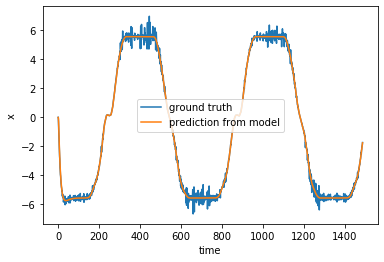

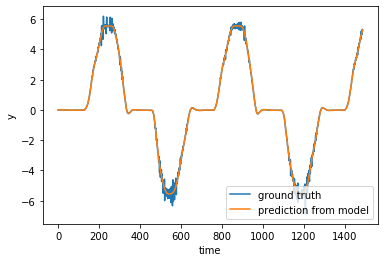

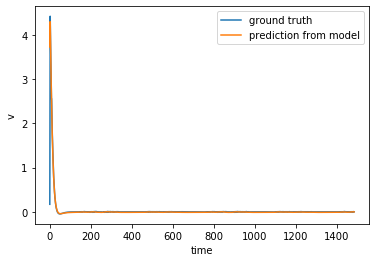

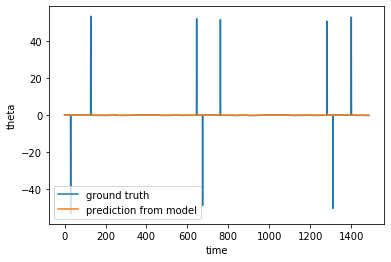

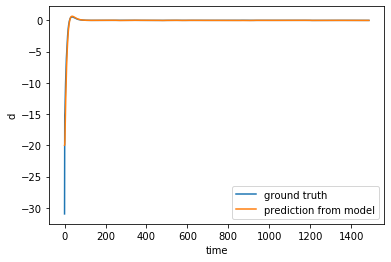

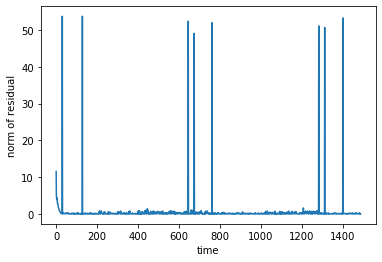

In [20]:
import matplotlib.pyplot as plt

plt.figure('x')
plt.xlabel('time')
plt.ylabel('x')
plt.plot(dx)
plt.plot(dx_p)
plt.legend(("ground truth", "prediction from model"))
plt.show()

plt.figure('y')
plt.xlabel('time')
plt.ylabel('y')
plt.plot(dy)
plt.plot(dy_p)
plt.legend(("ground truth", "prediction from model"))
plt.show()

plt.figure('v')
plt.xlabel('time')
plt.ylabel('v')
plt.plot(dv)
plt.plot(dv_p)
plt.legend(("ground truth", "prediction from model"))
plt.show()

plt.figure('theta')
plt.xlabel('time')
plt.ylabel('theta')
plt.plot(dtheta)
plt.plot(dtheta_p)
plt.legend(("ground truth", "prediction from model"))
plt.show()

plt.figure('d')
plt.xlabel('time')
plt.ylabel('d')
plt.plot(dd)
plt.plot(dd_p)
plt.legend(("ground truth", "prediction from model"))
plt.show()

plt.figure()
plt.xlabel('time')
plt.ylabel('norm of residual')
plt.plot(norm)
plt.show()
